<a href="https://colab.research.google.com/github/heysayanallgood/IEEE-CSTask2/blob/main/AIMLTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🤖 AI/ML Task: Image Classification Challenge

In [ ]:
!pip install --upgrade tensorflow
!pip install idx2numpy


  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=d8930c46386f73187130a60fd2192684dffef616955b40c5117910b52ef54277
  Stored in directory: /root/.cache/pip/wheels/87/e5/e7/70fc742b3645ddf9d392f766feccbcc95cb3a3c806f8588af0
Successfully built idx2numpy


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
import os
import zipfile
import numpy as np
import idx2numpy
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Extract the dataset

In [ ]:
zip_path = "/content/dataset_aiml_task.zip"
extract_folder = "dataset_aiml_task/"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Load metadata

In [ ]:
csv_path = os.path.join(extract_folder, "dataset_aiml_task/data.csv")
data = pd.read_csv(csv_path)
print("Dataset sample:")
print(data.head())

Dataset sample:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0   

# Dataset statistics

In [ ]:
print("\nDataset summary:")
print(f"Total samples: {len(data)}")
print(f"Number of classes: {len(data['label'].unique())}")
print("\nLabel distribution:")
print(data['label'].value_counts())


Dataset summary:
Total samples: 60000
Number of classes: 10

Label distribution:
label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64


# Visualize label distribution


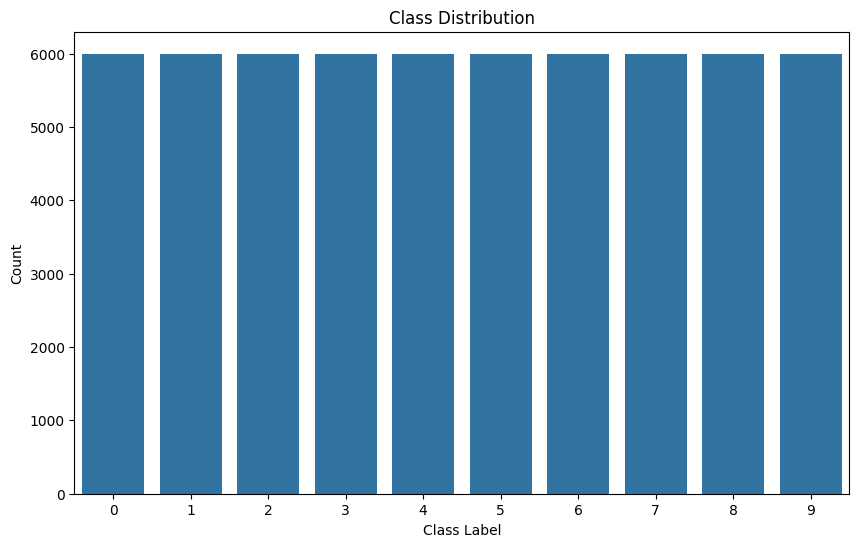

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=data)
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

# Load and process images

In [ ]:
extract_folder = "dataset_aiml_task/dataset_aiml_task"
images_path = os.path.join(extract_folder, "images-idx3-ubyte")
labels_path = os.path.join(extract_folder, "labels-idx1-ubyte")

# Load images and labels
with open(images_path, 'rb') as f:
    images = idx2numpy.convert_from_file(f)
with open(labels_path, 'rb') as f:
    labels = idx2numpy.convert_from_file(f)

# Normalize images
images = images.astype(np.float32) / 255.0

# Print dataset details
print(f"Images shape: {images.shape}")  # (num_samples, 28, 28)
print(f"Labels shape: {labels.shape}")  # (num_samples,)

Images shape: (60000, 28, 28)
Labels shape: (60000,)


# Display sample images

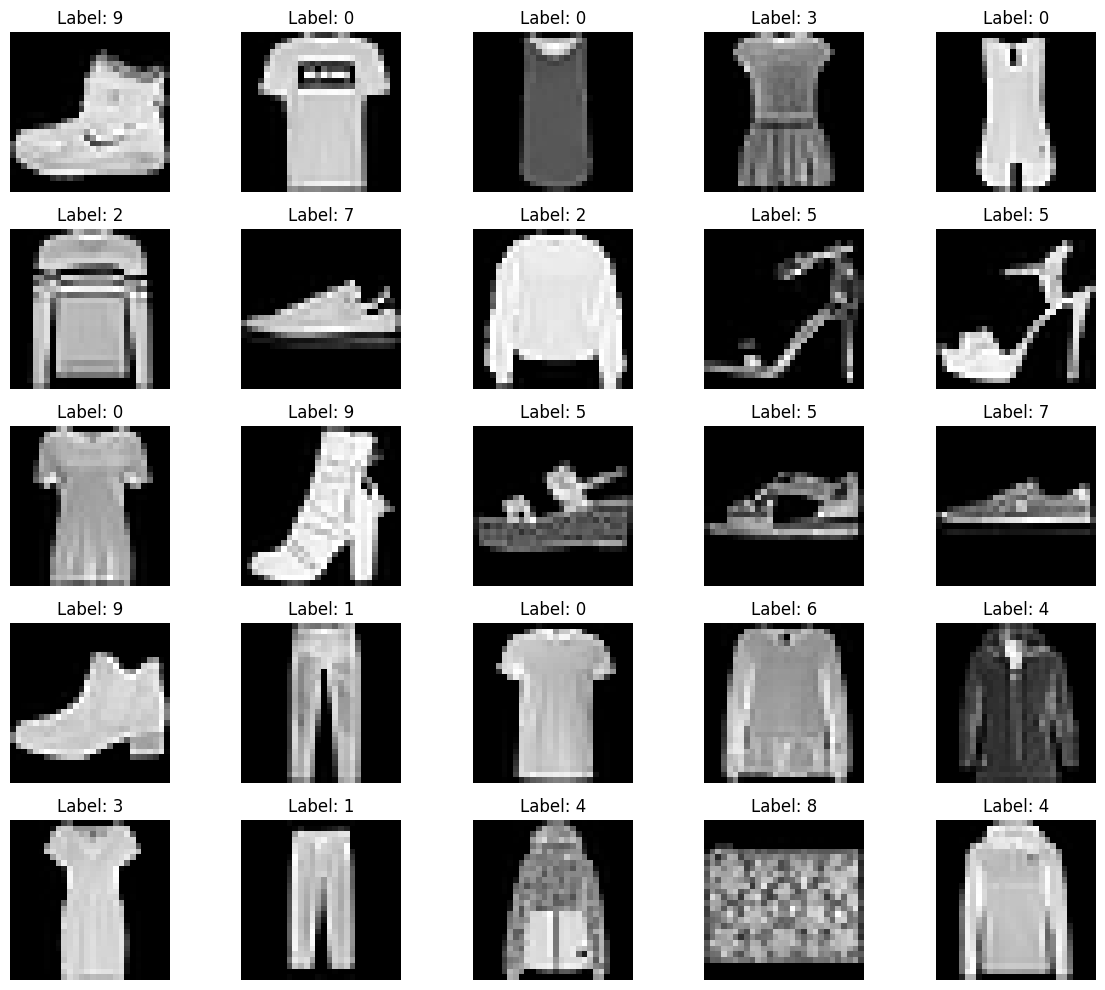

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Data preparation for Logistic Regression

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Train Logistic Regression model

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_flat, y_train)

y_pred = log_reg.predict(X_val_flat)
accuracy = accuracy_score(y_val, y_pred)
print(f"\nValidation Accuracy: {accuracy*100:.2f}%")


Validation Accuracy: 85.06%


# Confusion Matrix

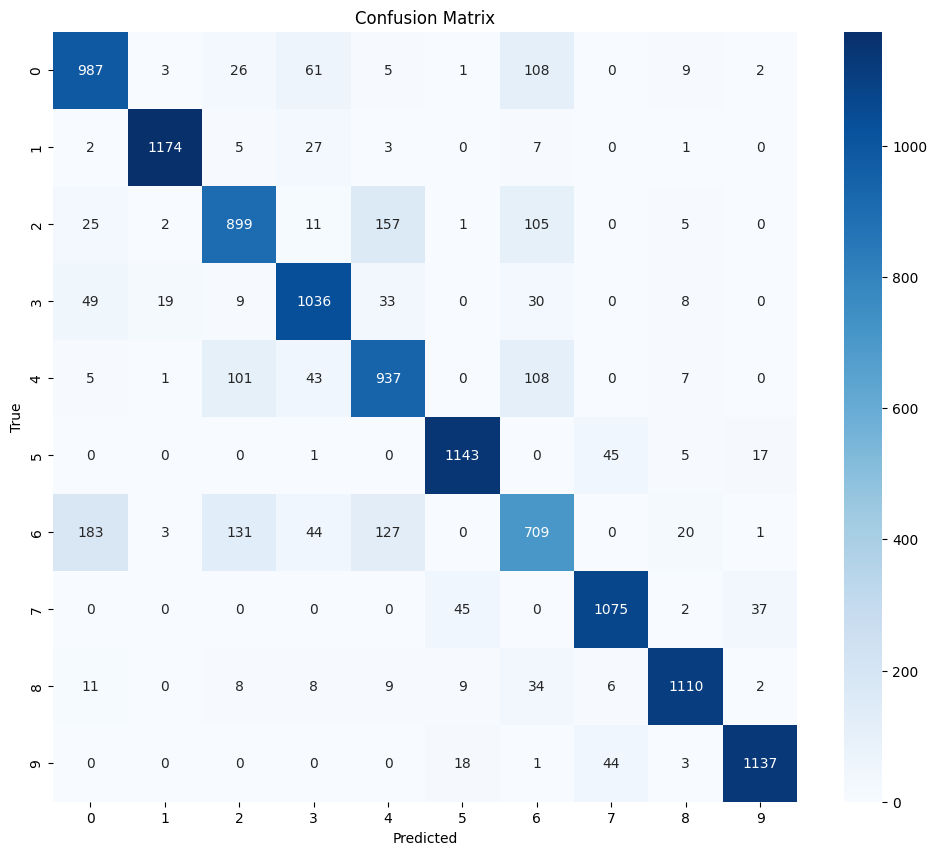

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature importance visualization

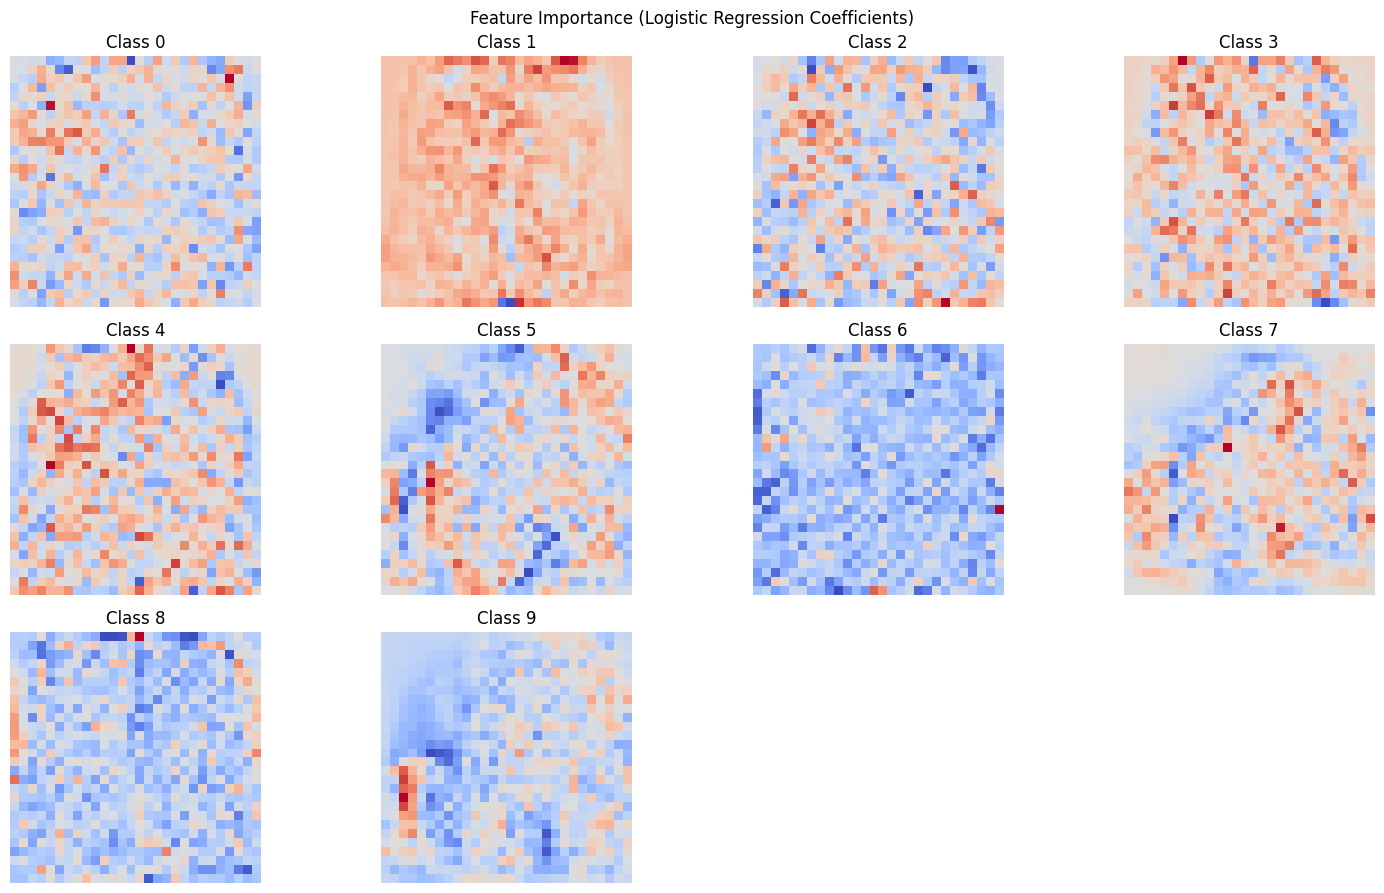

In [ ]:
class_names = sorted(np.unique(labels))
plt.figure(figsize=(15, 12))
for i, class_name in enumerate(class_names):
    plt.subplot(4, 4, i+1)
    coef = log_reg.coef_[i].reshape(28, 28)
    plt.imshow(coef, cmap='coolwarm')
    plt.title(f"Class {class_name}")
    plt.axis('off')
plt.suptitle('Feature Importance (Logistic Regression Coefficients)')
plt.tight_layout()
plt.show()


# Neural Network Model


In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# Train Neural Network model

In [ ]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7407 - loss: 0.7282 - val_accuracy: 0.8573 - val_loss: 0.3979
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8468 - loss: 0.4207 - val_accuracy: 0.8514 - val_loss: 0.4018
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8604 - loss: 0.3812 - val_accuracy: 0.8618 - val_loss: 0.3698
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8654 - loss: 0.3652 - val_accuracy: 0.8740 - val_loss: 0.3455
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8766 - loss: 0.3372 - val_accuracy: 0.8752 - val_loss: 0.3412
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8768 - loss: 0.3346 - val_accuracy: 0.8761 - val_loss: 0.3386
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8788 - loss: 0.3270 - val_accuracy: 0.8783 - val_loss: 0.3342
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8861 - loss: 0.3044 -

# Training curves

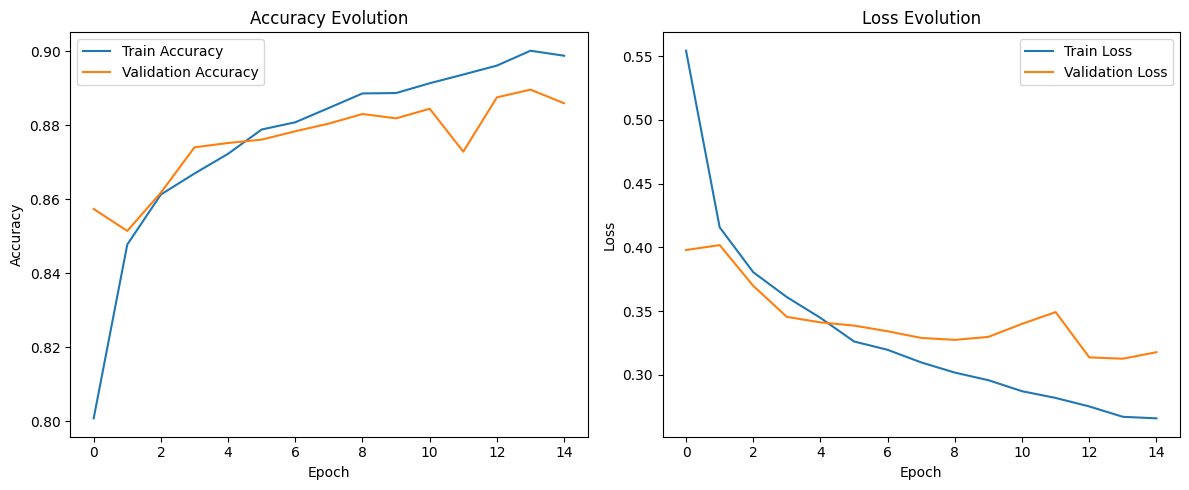

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

# Final evaluation

In [ ]:
test_loss, test_acc = model.evaluate(X_val, y_val)
print(f"\nFinal Validation Accuracy: {test_acc*100:.2f}%")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8875 - loss: 0.3149

Final Validation Accuracy: 88.59%


# Model comparison

In [ ]:
print("\nModel Comparison:")
print(f"- Logistic Regression: {accuracy*100:.2f}%")
print(f"- Neural Network: {test_acc*100:.2f}%")


Model Comparison:
- Logistic Regression: 85.06%
- Neural Network: 88.59%
